In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from random import uniform
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 20), nn.Tanh(),
            nn.Linear(20, 1)
        )
    def forward(self,x):
        x=self.net(x)
        return x
    def init_bias(self):
        for layer in self.net.children():
            if isinstance(layer, nn.Linear):
                # 权重采用Xavier正态初始化
                nn.init.xavier_normal_(layer.weight, gain=5 / 3)
                # 偏置置0
                nn.init.constant_(layer.bias, 0.)

In [3]:
def u_function(x, y):
    u = model(torch.hstack((x, y)))
    return u

def f(x, y, a = 10):
    f = (2 ** (4 * a)) * (x ** a) * ((1 - x) ** a) * (y ** a) * ((1 - y) ** a)
    f.requires_grad_(True)
    f_x = torch.autograd.grad(f, x, torch.ones_like(f), retain_graph=True, create_graph=True)[0]
    f_y = torch.autograd.grad(f, y, torch.ones_like(f), retain_graph=True, create_graph=True)[0]
    f_xx = torch.autograd.grad(f_x, x, torch.ones_like(f_x), retain_graph=True, create_graph=True)[0]
    f_yy = torch.autograd.grad(f_y, y, torch.ones_like(f_y), retain_graph=True, create_graph=True)[0]
    return - f_xx - f_yy

def f_function(x, y):
    u = u_function(x, y)
    u_x = torch.autograd.grad(u, x, torch.ones_like(u), retain_graph=True, create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, torch.ones_like(u_x), retain_graph=True, create_graph=True)[0]
    u_y = torch.autograd.grad(u, y, torch.ones_like(u), retain_graph=True, create_graph=True)[0]
    u_yy = torch.autograd.grad(u_y, y, torch.ones_like(u_y), retain_graph=True, create_graph=True)[0]
    u_f = f(x, y)
    return u_xx + u_yy + u_f

def Loss(u, x_u, y_u, x_f, y_f):
    u_pre = u_function(x_u, y_u)
    f_pre = f_function(x_f, y_f)
    # loss
    null =  torch.zeros((x_f.shape[0], 1))
    u_loss = loss_fn(u_pre, u)
    f_loss = loss_fn(f_pre, null)
    ls = u_loss + f_loss
    ls.backward()
    return ls
    

In [4]:
# 制造数据点集，要求区分边界点X_u_train和内点X_f_train
N_u = 200
N_f = 10000

# 边界点
x_right = np.ones((N_u // 4, 1), dtype=float)
x_left = np.zeros((N_u // 4, 1), dtype=float)
x_up = np.random.rand(N_u // 4, 1)
x_down = np.random.rand(N_u // 4, 1)

y_right = np.random.rand(N_u // 4, 1)
y_left = np.random.rand(N_u // 4, 1)
y_up = np.ones((N_u // 4, 1), dtype=float)
y_down = np.zeros((N_u // 4, 1), dtype=float)

X_right = np.hstack((x_right, y_right))
X_left = np.hstack((x_left, y_left))
X_up = np.hstack((x_up, y_up))
X_down = np.hstack((x_down, y_down))

X_u_train = np.vstack((X_right, X_left, X_up, X_down))
index = np.arange(0, N_u)
np.random.shuffle(index)
X_u_train = X_u_train[index, :]

# 内点
X_f_train = np.zeros((N_f, 2), dtype=float)
for row in range(N_f):
    x = uniform(0, 1)
    y = uniform(0, 1)
    X_f_train[row, 0] = x 
    X_f_train[row, 1] = y
X_f_train = np.vstack((X_f_train, X_u_train))
np.random.shuffle(X_f_train)
# 边界条件
u_train = np.zeros((N_u, 1), dtype=float)
u_train = u_train[index, :]

[Epoch 1/5000] [loss: 528.6287231445312]
[Epoch 101/5000] [loss: 12.403149604797363]
[Epoch 201/5000] [loss: 2.071056604385376]
[Epoch 301/5000] [loss: 1.6486403942108154]
[Epoch 401/5000] [loss: 0.41706132888793945]
[Epoch 501/5000] [loss: 0.19274555146694183]
[Epoch 601/5000] [loss: 0.1432330310344696]
[Epoch 701/5000] [loss: 0.11481595784425735]
[Epoch 801/5000] [loss: 0.09633883833885193]
[Epoch 901/5000] [loss: 0.08353951573371887]
[Epoch 1001/5000] [loss: 0.07430820167064667]
[Epoch 1101/5000] [loss: 0.06741343438625336]
[Epoch 1201/5000] [loss: 0.06209186092019081]
[Epoch 1301/5000] [loss: 0.057860132306814194]
[Epoch 1401/5000] [loss: 0.054406654089689255]
[Epoch 1501/5000] [loss: 0.0515265017747879]
[Epoch 1601/5000] [loss: 0.04908119514584541]
[Epoch 1701/5000] [loss: 0.04697439447045326]
[Epoch 1801/5000] [loss: 0.04513690620660782]
[Epoch 1901/5000] [loss: 0.04351840913295746]
[Epoch 2001/5000] [loss: 0.04208078980445862]
[Epoch 2101/5000] [loss: 0.04079490154981613]
[Epoch

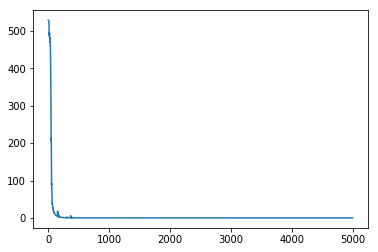

In [5]:
# 模型训练
model=MLP()
loss_fn = nn.MSELoss()  #均方差做损失函数

x_u = torch.tensor(X_u_train[:, 0].reshape(-1, 1), dtype=torch.float32, requires_grad=True)
y_u = torch.tensor(X_u_train[:, 1].reshape(-1, 1), dtype=torch.float32, requires_grad=True)

x_f = torch.tensor(X_f_train[:, 0].reshape(-1, 1), dtype=torch.float32, requires_grad=True)
y_f = torch.tensor(X_f_train[:, 1].reshape(-1, 1), dtype=torch.float32, requires_grad=True)

u = torch.tensor(u_train, dtype=torch.float32)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.9, verbose=False) # 动态递减学习率
epochs = 5000
Losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = Loss(u, x_u, y_u, x_f, y_f)
    Losses.append(loss.item())
    if epoch % 100 ==0:
        print(f"[Epoch {epoch+1}/{epochs}] [loss: {loss.item()}]")
    optimizer.step()
    scheduler.step()
plt.plot(Losses)
plt.show()

E:\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


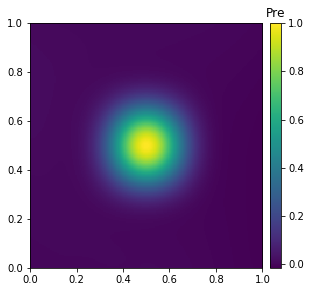

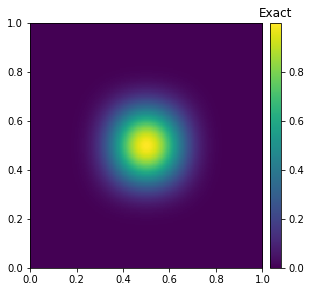

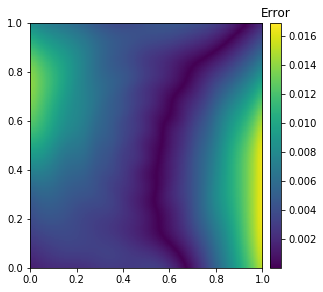

In [6]:
def Exact_u(x, y, a = 10):
    u = (2 ** (4 * a)) * (x ** a) * ((1 - x) ** a) * (y ** a) * ((1 - y) ** a)
    return u

x = torch.linspace(0, 1, 200, dtype=torch.float32)
y = torch.linspace(0, 1, 200, dtype=torch.float32)
X, Y = torch.meshgrid(x, y)
xcol = X.reshape(-1, 1)
ycol = Y.reshape(-1, 1)
u_pre = u_function(xcol, ycol).reshape(x.numel(), y.numel())
xnp = x.numpy()
ynp = y.numpy()
Unp = u_pre.detach().numpy()
# Pre plot:
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.add_subplot(111)

h = ax.imshow(Unp,
              interpolation='nearest',
              cmap='viridis', 
              extent=[ynp.min(), ynp.max(), xnp.min(), xnp.max()], 
              origin='lower', aspect='auto')
divider = make_axes_locatable(ax) # 新建一个坐标轴，右侧
cax = divider.append_axes("right", size="5%", pad=0.10)
cbar = fig.colorbar(h, cax=cax)
cbar.ax.tick_params(labelsize=10)
plt.title('Pre')
plt.show()
# Exact plot:
u_exact = Exact_u(xcol, ycol).reshape(x.numel(), y.numel())
Uex = u_exact.detach().numpy()

fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.add_subplot(111)

h = ax.imshow(Uex,
              interpolation='nearest',
              cmap='viridis', 
              extent=[ynp.min(), ynp.max(), xnp.min(), xnp.max()], 
              origin='lower', aspect='auto')
divider = make_axes_locatable(ax) # 新建一个坐标轴，右侧
cax = divider.append_axes("right", size="5%", pad=0.10)
cbar = fig.colorbar(h, cax=cax)
cbar.ax.tick_params(labelsize=10)
plt.title('Exact')
plt.show()
# Error plot
Uerror = np.abs(Unp - Uex)
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.add_subplot(111)

h = ax.imshow(Uerror,
              interpolation='nearest',
              cmap='viridis', 
              extent=[ynp.min(), ynp.max(), xnp.min(), xnp.max()], 
              origin='lower', aspect='auto')
divider = make_axes_locatable(ax) # 新建一个坐标轴，右侧
cax = divider.append_axes("right", size="5%", pad=0.10)
cbar = fig.colorbar(h, cax=cax)
cbar.ax.tick_params(labelsize=10)
plt.title('Error')
plt.show()